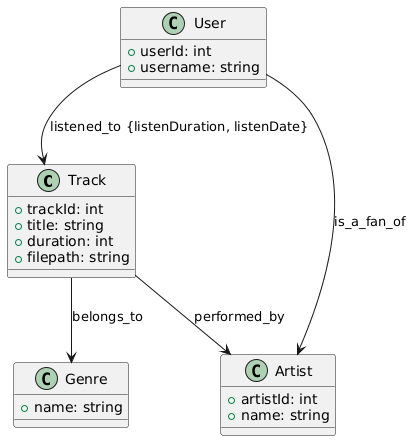

In [1]:
import plantuml
from IPython.display import Image, display

def render_plantuml_method1(uml_code):
    # Create PlantUML server instance
    server = plantuml.PlantUML(url='http://www.plantuml.com/plantuml/img/')
    
    # Get the image data
    image_data = server.processes(uml_code)
    
    # Display the image properly
    return Image(image_data)

# Example usage
uml_example = """
@startuml
class Track {
    +trackId: int
    +title: string
    +duration: int
    +filepath: string
}

class Artist {
    +artistId: int
    +name: string
}

class Genre {
    +name: string
}

class User {
    +userId: int
    +username: string
}


Track --> Artist : performed_by
Track --> Genre : belongs_to
User --> Track : listened_to {listenDuration, listenDate}
User --> Artist : is_a_fan_of
@enduml
"""

# This will display the image
display(render_plantuml_method1(uml_example))

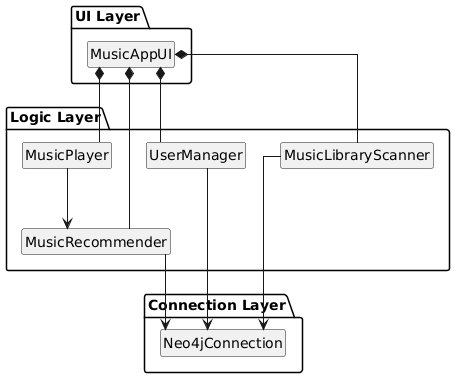

In [2]:
# JUPYTER NÁVRH

uml_example = """
@startuml

' Nastavení vzhledu
skinparam classAttributeIconSize 0
skinparam monochrome true
skinparam linetype ortho

hide members
hide circle

' --- VRSTVA PŘIPOJENÍ ---
package "Connection Layer" {
    class Neo4jConnection {
        - driver : GraphDatabase.driver
        + __init__(uri, user, password)
        + close() : void
        + query(query, parameters) : list
    }
}

' --- LOGICKÁ VRSTVA ---
package "Logic Layer" {
    class UserManager {
        - conn : Neo4jConnection
        + __init__(neo4j_conn)
        + register_user(username) : (str, str)
        + login_user(username) : (str, str)
    }

    class MusicLibraryScanner {
        - conn : Neo4jConnection
        + __init__(neo4j_conn)
        + scan_directory(directory_path) : int
        - _process_mp3_file(file_path) : void
        + get_all_tracks() : list
    }

    class MusicRecommender {
        - conn : Neo4jConnection
        + __init__(neo4j_conn)
        + collaborative_filtering(user_id, limit) : list
        + content_based_filtering(user_id, limit) : list
        + hybrid_recommendation(user_id, limit) : list
        + record_listen(user_id, track_id, duration, date) : void
        + add_fan_relationship(user_id, artist_id) : void
    }

    class MusicPlayer {
        - recommender : MusicRecommender
        - current_track_id : str
        - current_artist_id : str
        - is_playing : bool
        - current_user_id : str
        - play_start_time : float
        + __init__(recommender)
        + play(file_path, track_id, artist_id) : (bool, str)
        + pause() : str
        + stop() : str
        + add_artist_to_favorites() : (bool, str)
        - _record_listen_time() : void
    }
}

' --- PREZENTAČNÍ VRSTVA (Jupyter) ---
package "UI Layer" {
    class MusicAppUI {
        - user_manager : UserManager
        - scanner : MusicLibraryScanner
        - recommender : MusicRecommender
        - player : MusicPlayer
        - music_dir : str
        - current_user : dict
        - main_output : widgets.Output
        + __init__(music_dir)
        -- UI Generation --
        + create_login_screen() : void
        + create_player_screen() : void
        -- Event Handlers (internal) --
        - on_login(b)
        - on_register(b)
        - on_play(b)
        - on_stop(b)
        - on_favorite(b)
        - on_recommend(b)
    }
}

' --- VZTAHY ---

' UI vlastní instance logických tříd
MusicAppUI *-- UserManager
MusicAppUI *-- MusicLibraryScanner
MusicAppUI *-- MusicRecommender
MusicAppUI *-- MusicPlayer

' Přehrávač používá doporučovač pro logování historie
MusicPlayer --> MusicRecommender

' Logické třídy používají připojení k DB
UserManager --> Neo4jConnection
MusicLibraryScanner --> Neo4jConnection
MusicRecommender --> Neo4jConnection

@enduml
"""

display(render_plantuml_method1(uml_example))

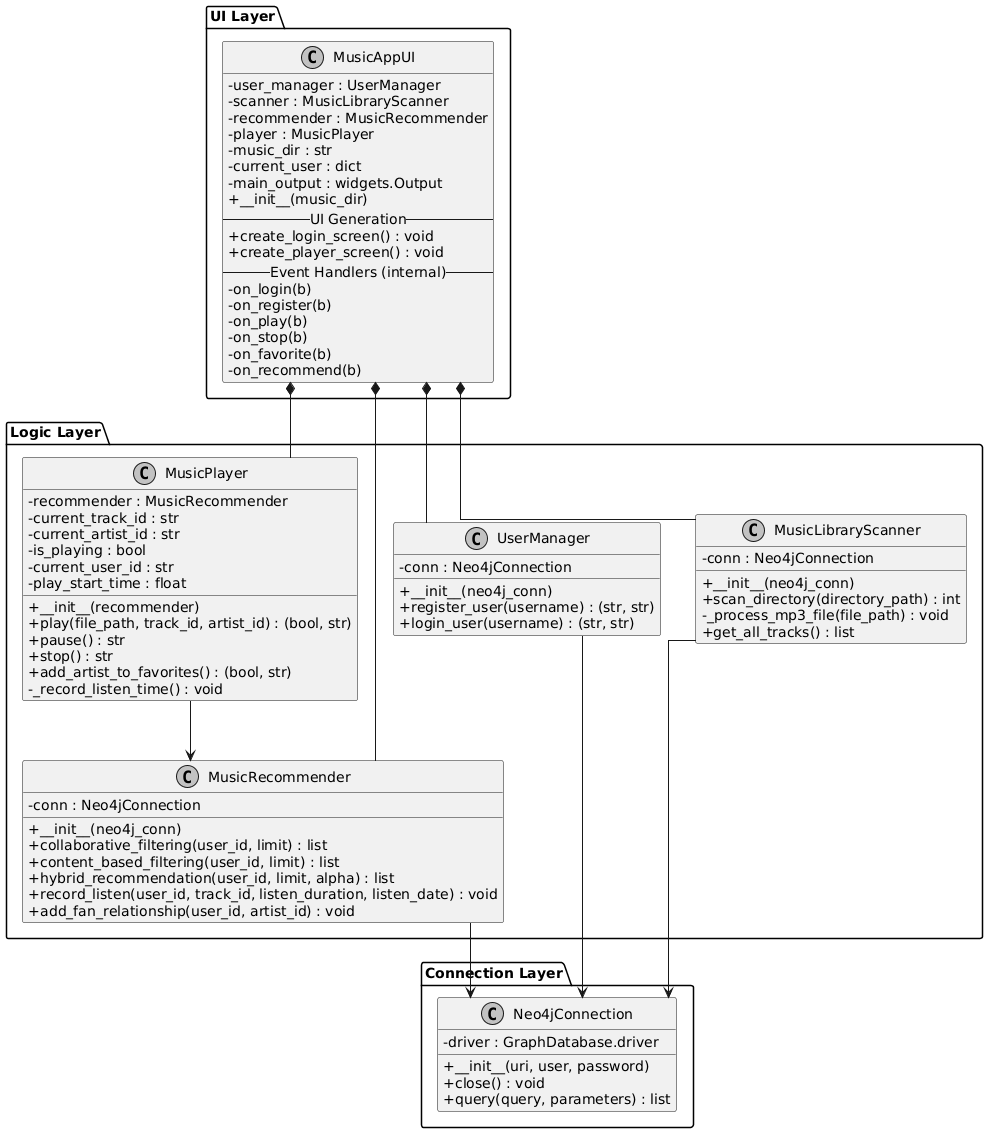

In [3]:
# JUPYTER

uml_example = """
@startuml

' Nastavení vzhledu
skinparam classAttributeIconSize 0
skinparam monochrome true
skinparam linetype ortho

' --- VRSTVA PŘIPOJENÍ ---
package "Connection Layer" {
    class Neo4jConnection {
        - driver : GraphDatabase.driver
        + __init__(uri, user, password)
        + close() : void
        + query(query, parameters) : list
    }
}

' --- LOGICKÁ VRSTVA ---
package "Logic Layer" {
    class UserManager {
        - conn : Neo4jConnection
        + __init__(neo4j_conn)
        + register_user(username) : (str, str)
        + login_user(username) : (str, str)
    }

    class MusicLibraryScanner {
        - conn : Neo4jConnection
        + __init__(neo4j_conn)
        + scan_directory(directory_path) : int
        - _process_mp3_file(file_path) : void
        + get_all_tracks() : list
    }

    class MusicRecommender {
        - conn : Neo4jConnection
        + __init__(neo4j_conn)
        + collaborative_filtering(user_id, limit) : list
        + content_based_filtering(user_id, limit) : list
        + hybrid_recommendation(user_id, limit, alpha) : list
        + record_listen(user_id, track_id, listen_duration, listen_date) : void
        + add_fan_relationship(user_id, artist_id) : void
    }

    class MusicPlayer {
        - recommender : MusicRecommender
        - current_track_id : str
        - current_artist_id : str
        - is_playing : bool
        - current_user_id : str
        - play_start_time : float
        + __init__(recommender)
        + play(file_path, track_id, artist_id) : (bool, str)
        + pause() : str
        + stop() : str
        + add_artist_to_favorites() : (bool, str)
        - _record_listen_time() : void
    }
}

' --- PREZENTAČNÍ VRSTVA (Jupyter) ---
package "UI Layer" {
    class MusicAppUI {
        - user_manager : UserManager
        - scanner : MusicLibraryScanner
        - recommender : MusicRecommender
        - player : MusicPlayer
        - music_dir : str
        - current_user : dict
        - main_output : widgets.Output
        + __init__(music_dir)
        -- UI Generation --
        + create_login_screen() : void
        + create_player_screen() : void
        -- Event Handlers (internal) --
        - on_login(b)
        - on_register(b)
        - on_play(b)
        - on_stop(b)
        - on_favorite(b)
        - on_recommend(b)
    }
}

' --- VZTAHY ---

' UI vlastní instance logických tříd
MusicAppUI *-- UserManager
MusicAppUI *-- MusicLibraryScanner
MusicAppUI *-- MusicRecommender
MusicAppUI *-- MusicPlayer

' Přehrávač používá doporučovač pro logování historie
MusicPlayer --> MusicRecommender

' Logické třídy používají připojení k DB
UserManager --> Neo4jConnection
MusicLibraryScanner --> Neo4jConnection
MusicRecommender --> Neo4jConnection

@enduml
"""

display(render_plantuml_method1(uml_example))

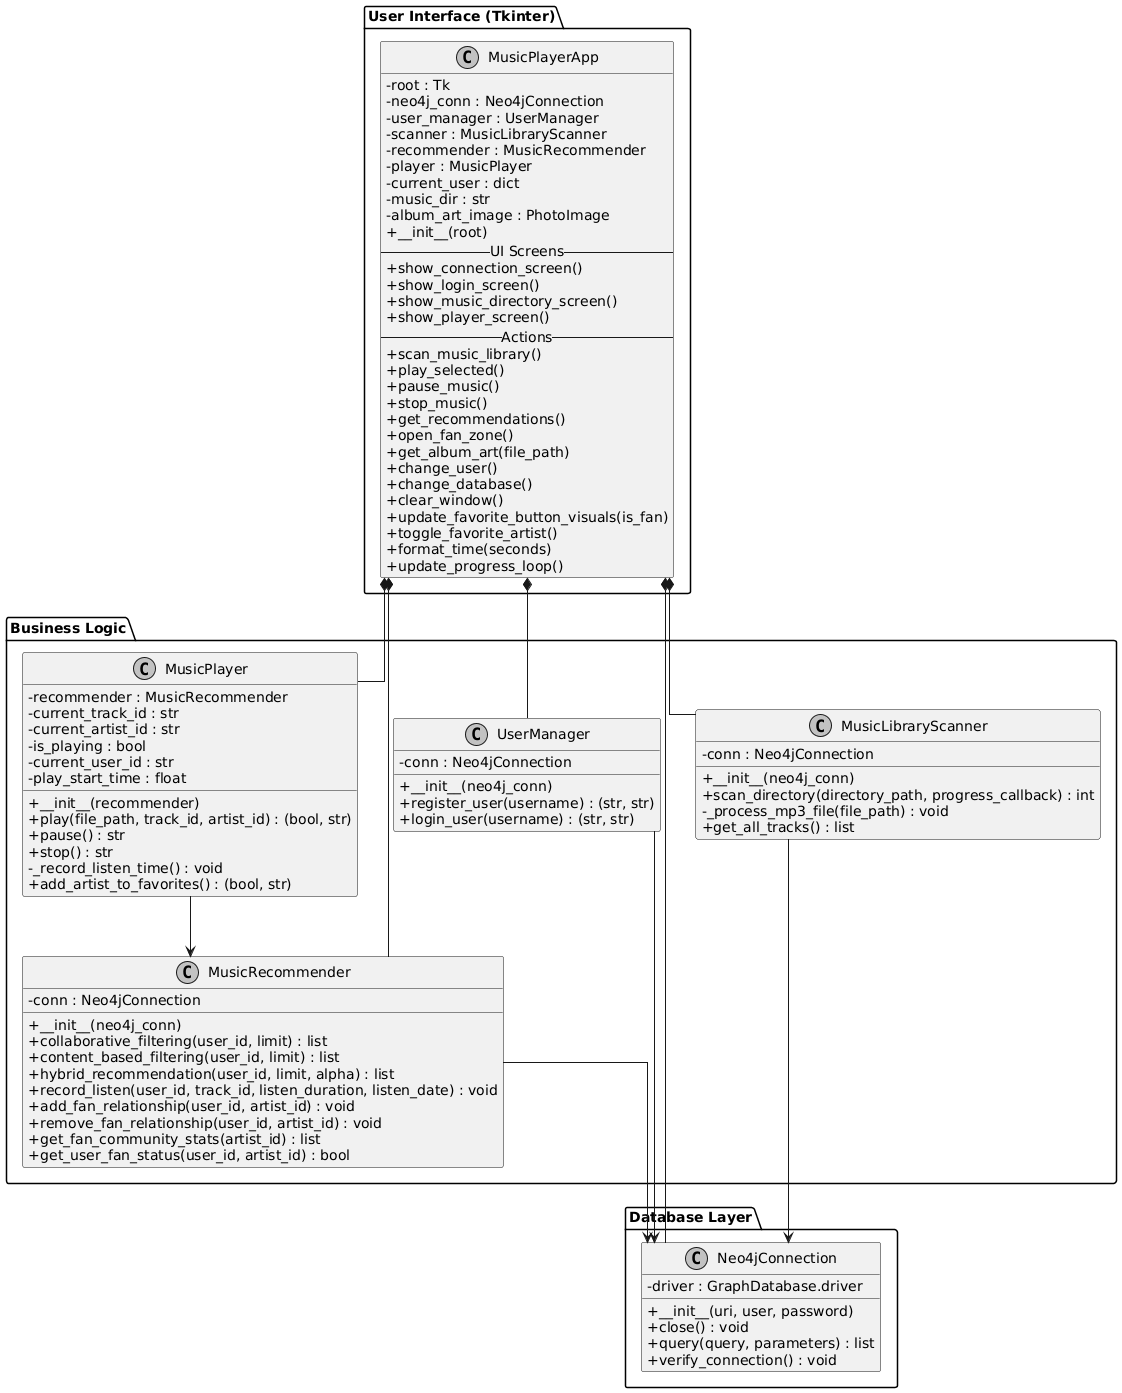

In [4]:
# DESKTOP

uml_example = """
@startuml

' Nastavení vzhledu
skinparam classAttributeIconSize 0
skinparam monochrome true
skinparam linetype ortho

' --- BALÍČEK DATABÁZE ---
package "Database Layer" {
    class Neo4jConnection {
        - driver : GraphDatabase.driver
        + __init__(uri, user, password)
        + close() : void
        + query(query, parameters) : list
        + verify_connection() : void
    }
}

' --- BALÍČEK LOGIKY ---
package "Business Logic" {
    class UserManager {
        - conn : Neo4jConnection
        + __init__(neo4j_conn)
        + register_user(username) : (str, str)
        + login_user(username) : (str, str)
    }

    class MusicLibraryScanner {
        - conn : Neo4jConnection
        + __init__(neo4j_conn)
        + scan_directory(directory_path, progress_callback) : int
        - _process_mp3_file(file_path) : void
        + get_all_tracks() : list
    }

    class MusicRecommender {
        - conn : Neo4jConnection
        + __init__(neo4j_conn)
        + collaborative_filtering(user_id, limit) : list
        + content_based_filtering(user_id, limit) : list
        + hybrid_recommendation(user_id, limit, alpha) : list
        + record_listen(user_id, track_id, listen_duration, listen_date) : void
        + add_fan_relationship(user_id, artist_id) : void
        + remove_fan_relationship(user_id, artist_id) : void
        + get_fan_community_stats(artist_id) : list
        + get_user_fan_status(user_id, artist_id) : bool
    }

    class MusicPlayer {
        - recommender : MusicRecommender
        - current_track_id : str
        - current_artist_id : str
        - is_playing : bool
        - current_user_id : str
        - play_start_time : float
        + __init__(recommender)
        + play(file_path, track_id, artist_id) : (bool, str)
        + pause() : str
        + stop() : str
        - _record_listen_time() : void
        + add_artist_to_favorites() : (bool, str)
    }
}

' --- BALÍČEK UI ---
package "User Interface (Tkinter)" {
    class MusicPlayerApp {
        - root : Tk
        - neo4j_conn : Neo4jConnection
        - user_manager : UserManager
        - scanner : MusicLibraryScanner
        - recommender : MusicRecommender
        - player : MusicPlayer
        - current_user : dict
        - music_dir : str
        - album_art_image : PhotoImage
        + __init__(root)
        -- UI Screens --
        + show_connection_screen()
        + show_login_screen()
        + show_music_directory_screen()
        + show_player_screen()
        -- Actions --
        + scan_music_library()
        + play_selected()
        + pause_music()
        + stop_music()
        + get_recommendations()
        + open_fan_zone()
        + get_album_art(file_path)
        + change_user()
        + change_database()
        + clear_window()
        + update_favorite_button_visuals(is_fan)
        + toggle_favorite_artist()
        + format_time(seconds)
        + update_progress_loop()
    }
}

' --- VZTAHY ---

' App skládá a řídí ostatní komponenty
MusicPlayerApp *-- Neo4jConnection
MusicPlayerApp *-- UserManager
MusicPlayerApp *-- MusicLibraryScanner
MusicPlayerApp *-- MusicRecommender
MusicPlayerApp *-- MusicPlayer

' Závislosti na DB spojení
UserManager --> Neo4jConnection
MusicLibraryScanner --> Neo4jConnection
MusicRecommender --> Neo4jConnection

' Závislost přehrávače na doporučovači (pro logování)
MusicPlayer --> MusicRecommender

@enduml
"""

display(render_plantuml_method1(uml_example))